In [60]:
!pip install pillow 

In [117]:
import sys, os
sys.path.append("./code/")
from dataset.mnist import load_mnist
import numpy as np
from PIL import Image
def img_show(img):
    pil_img=Image.fromarray(np.uint8(img))
    pil_img.show()
    return pil_img
np.set_printoptions(linewidth=200,threshold=1000)

(x_train, t_train),(x_test, t_test)=load_mnist(flatten=False,normalize=False)
t_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [101]:
img = x_train[0]#0번째에는 5, 1번째에는 0이 있는걸 확인할수 있다.
label = t_train[0]
img_1=img.reshape(28,28)
img_show(img_1)
print(img_1.shape)
print(label)

(28, 28)
5


In [102]:
x_test[3].shape

(784,)

In [99]:
Image.fromarray(np.uint8(img_1))

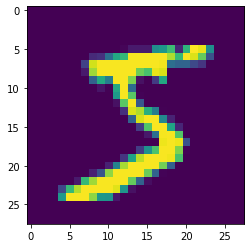

In [128]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0][0])
plt.show()

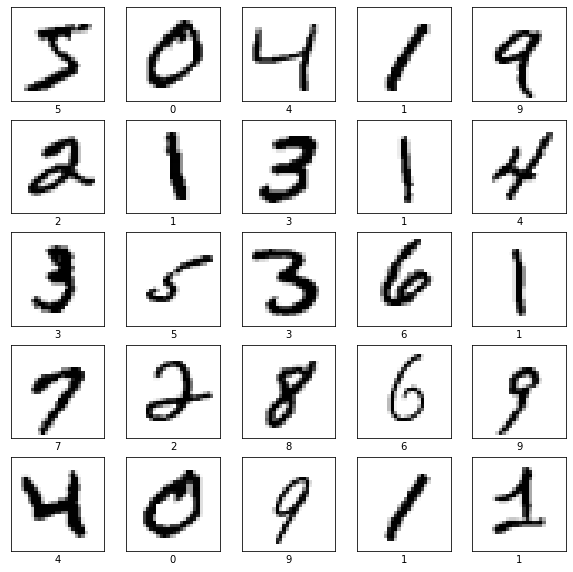

In [132]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i][0], cmap=plt.cm.binary)
    plt.xlabel(t_train[i])
plt.show()

In [149]:
import pickle
def get_data():
    (x_train, t_train),(x_test, t_test)=load_mnist(flatten=True,normalize=True)
    return x_test,t_test

def init_network():
    with open(".\code\ch03\sample_weight.pkl","rb") as f:
        network = pickle.load(f)
    return network

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    return y

def predict(network,x):
    W1, W2, W3 = network['W1'],network['W2'],network['W3']
    b1, b2, b3 = network['b1'],network['b2'],network['b3']
    
    a1=np.dot(x,W1)+b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=softmax(a3)
    
    return y

In [150]:
network['W1'].shape

(784, 50)

In [151]:
x,t =get_data() # 시험 이미지와 레이블을 가져온다.
network = init_network() 
#pickle 파일인 samle_weight.pkl 에 저장된 '학습된 가중치 매개변수'를 읽는다

accuracy_cnt=0 # 정확도 카운트
for i in range(len(x)): # 테스트 데이터의 개수만큼 반복한다.
    y=predict(network,x[i]) #softmax에의한 확률 벡터값 
    p=np.argmax(y) # 최대값의 인덱스를 표현한다.
    if p == t[i]:
        accuracy_cnt += 1
[0.7,0.3,0.1,0,0---]
print("Accuracy:"+str(float(accuracy_cnt)/ len(x)))

Accuracy:0.9352


In [152]:
network['W1'].shape
network['W2'].shape
network['W3'].shape
network['b1'].shape
network['b2'].shape
network['b3'].shape

(10,)

In [153]:
batch_size=100
accuracy_cnt=0
for i in range(0, len(x), batch_size):
    x_batch=x[i:i+batch_size]
#     print(x_batch[1])
    y_batch=predict(network,x_batch)
    p=np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
[7,2,4,5,678]
print("Accuracy:"+str(float(accuracy_cnt)/ len(x)))
        

Accuracy:0.9352


In [155]:
len(x)

10000

In [156]:
print(p)

[8 9 0 1 2 9 4 5 6 7 8 0 1 2 3 4 7 8 9 7 8 6 4 1 9 2 8 4 4 7 0 1 9 2 8 7 8 2 6 0 0 6 3 5 9 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 3 2 4 9 4 3 6 4 1 7 2 6 2 0 1 2 8 4 5 6 7 8 9 0 1 2 3 4 5
 6]


In [169]:
x,t = get_data()
net_work = init_network()
error = [] # 오답에 대한 정답값
P = [] # 오답
for i in range(len(x)):
    y = predict(network,x[i])
    p = np.argmax(y)
    if p != t[i] :
        error.append(i)
        P.append(p)

In [175]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[error[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(t([error[i]]+"==>"+str(P[i]))
plt.show()

    

SyntaxError: invalid syntax (Temp/ipykernel_20912/2495065805.py, line 8)

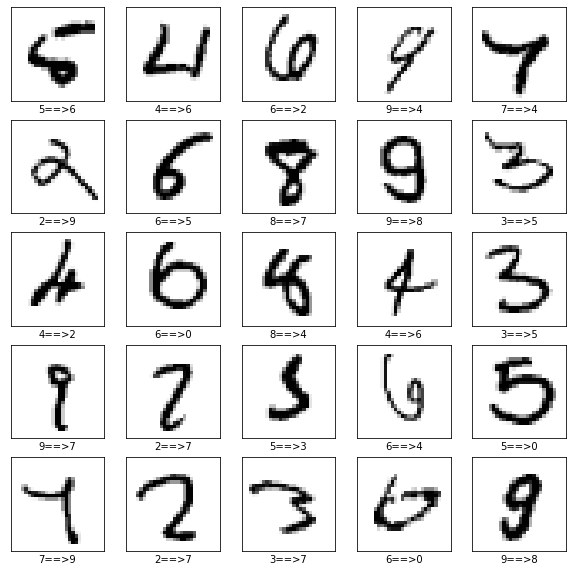

In [177]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[error[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(str(t[error[i]])+ "==>" + str(P[i]))
plt.show()

In [178]:
 
import sys, os
sys.path.append("./code/")
from dataset.mnist import load_mnist

(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)


In [179]:
train_size=x_train.shape[0]
batch_size = 100
batch_mask = np.random.choice(train_size, batch_size)#60,000이라는 숫자에서 100개의 숫자를 무작위로 추출
x_batch=x_train[batch_mask]#추출한 숫자를 인덱스로 사용하여 데이터를 추출
t_batch=t_train[batch_mask]

In [180]:
print(x_batch)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 수치미분

In [188]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

def numerical_diff(f,x):
    h=1e-4 #0.0001
    return (f(x+h)-f(x-h))/(2*h)

In [189]:
numerical_diff(function_1,5)

0.1999999999990898

In [190]:
numerical_diff(function_1,10)

0.2999999999986347

0.1999999999990898


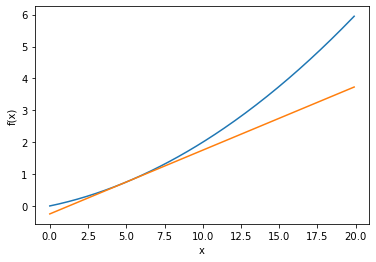

In [191]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 편미분 구현

In [192]:
def function_3(x,y):
    return x**2+y**2

In [194]:
x_3 = np.arange(-5,5,0.25)
y_3 = np.arange(-5,5,0.25)
function_3(x_3,y_3)

array([50.   , 45.125, 40.5  , 36.125, 32.   , 28.125, 24.5  , 21.125, 18.   , 15.125, 12.5  , 10.125,  8.   ,  6.125,  4.5  ,  3.125,  2.   ,  1.125,  0.5  ,  0.125,  0.   ,  0.125,  0.5  ,  1.125,
        2.   ,  3.125,  4.5  ,  6.125,  8.   , 10.125, 12.5  , 15.125, 18.   , 21.125, 24.5  , 28.125, 32.   , 36.125, 40.5  , 45.125])

C:\Users\asd\AppData\Local\Temp/ipykernel_20912/515401604.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


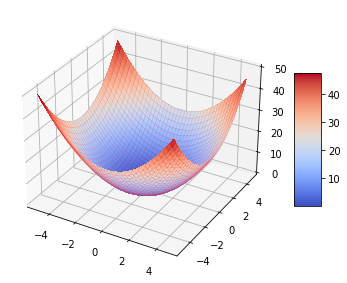

In [195]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

X,Y = np.meshgrid(x_3,y_3)
Z = function_3(X,Y)

surf = ax.plot_surface(X,Y,Z,cmap='coolwarm',linewidth=0,antialiased=False)
wire = ax.plot_wireframe(X,Y,Z,color='r',linewidth=0.1)
fig.colorbar(surf,shrink=0.5,aspect=5)
fig.tight_layout()
plt.show()

In [198]:
def numerical_gradient_1(f,x,y):
    h = 1e-4
    grad_1=(f(x+h,0)-f(x,0))/h
    grad_2=(f(0,y+h)-f(0,y))/h
    grad=np.array([grad_1,grad_2])
    return grad

def function_3(x,y):
    return x**2+y**2

No handles with labels found to put in legend.


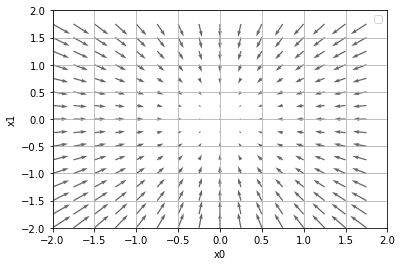

In [199]:
x0 = np.arange(-2.0, 2.0, 0.25)
x1 = np.arange(-2.0, 2.0, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient_1(function_3, X, Y)

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

In [200]:
def numerical_gradient_no_batch(f,x):
    h=1e-4
    grad = np.zeros_like(x) #x와 형상이 같은 배열을 생성
    
    for idx in rnage(x.size):
        tmp_val = x[idx]
        #f(x+h) 계산
        x[idx] = float(tmp_val)+h
        fxh1 = f(x)
        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x) 
        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
    return grad

def numerical_gradient(f,X):
    if x.ndim == 1: #X가 벡터일경우
        return numerical_gradient_no_batch(f,X)
    else:
        grad = np.zeors_like(X)
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_no_batch(f,x)
        return grad

